# Introduction

The model predicts car stopping distance based on the car's speed. The model is a univariate linear regression model. The car's speed is a feature, and the stopping distance is the target value. 

# Data source

The dataset is obtained from third party - [wolfram cloud](https://datarepository.wolframcloud.com/resources/Sample-Data-Car-Stopping-Distances/). The dataset is in csv format.

SOURCE METADATA
* Title: Car Stopping Distances
* Creator: Ezekiel, M.
* Publisher: Wiley
* Date: 1930
* Description: Data on the relation between the speed of the car and the distance for the car to stop.
* Language: English
* Source: Methods of Correlation Analysis

# Importing all the necessary packages

In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data exploration

## Loading the data

In [275]:
car_stopping_df = pd.read_csv("Sample-Data-Car-Stopping-Distances.csv")

## Structure of the data

In [276]:
car_stopping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Speed     50 non-null     object
 1   Distance  50 non-null     object
dtypes: object(2)
memory usage: 928.0+ bytes


The dataset contains 50 entries. There are two columns "Speed" and "Distance".

In [277]:
car_stopping_df.head()

,Speed,Distance
0,"Quantity[4, ""Miles""/""Hours""]","Quantity[2, ""Feet""]"
1,"Quantity[4, ""Miles""/""Hours""]","Quantity[10, ""Feet""]"
2,"Quantity[7, ""Miles""/""Hours""]","Quantity[4, ""Feet""]"
3,"Quantity[7, ""Miles""/""Hours""]","Quantity[22, ""Feet""]"
4,"Quantity[8, ""Miles""/""Hours""]","Quantity[16, ""Feet""]"


"Speed" and "Distance" columns contain string values.

# Data cleaning

## Check for null values

In [278]:
car_stopping_df.isnull().values.any()

False

So there are no null values.

## Store only numbers in "Speed" and "Distance" columns

The "Speed" and "Distance" columns contain string but we require numbers for constructing the model. Extract numbers from "Speed" and "Distance" columns and assign them to "Speed" and "Distance" columns.

In [279]:
car_stopping_df["Speed"] = car_stopping_df["Speed"].str.extract('(\d+)')
car_stopping_df["Distance"] = car_stopping_df["Distance"].str.extract('(\d+)')

car_stopping_df["Speed"] = car_stopping_df["Speed"].astype(np.float16)
car_stopping_df["Distance"] = car_stopping_df["Distance"].astype(np.float16)

In [280]:
print(car_stopping_df["Speed"].dtypes)
print(car_stopping_df["Distance"].dtypes)

float16
float16


In [281]:
car_stopping_df.head()

,Speed,Distance
0,4.0,2.0
1,4.0,10.0
2,7.0,4.0
3,7.0,22.0
4,8.0,16.0


In [282]:
car_stopping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Speed     50 non-null     float16
 1   Distance  50 non-null     float16
dtypes: float16(2)
memory usage: 328.0 bytes


# Model building

## Check whether there is a correlation between speed and stopping distance

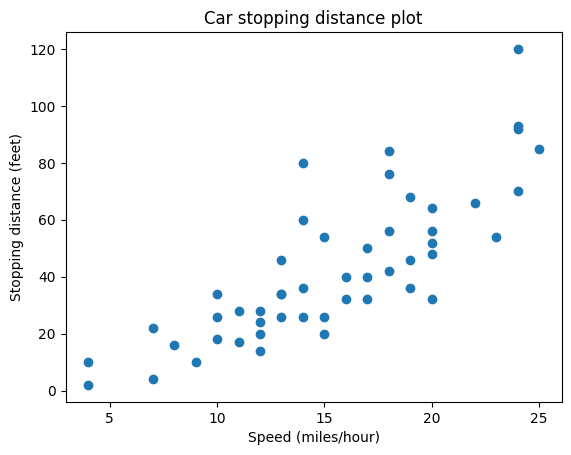

In [283]:
plt.scatter(car_stopping_df["Speed"], car_stopping_df["Distance"])
plt.xlabel("Speed (miles/hour)")
plt.ylabel("Stopping distance (feet)")
plt.title("Car stopping distance plot")
plt.show()

The scatter plot shows that there is a linear correlation between speed and stopping distance.

## Univariate linear regression model

### Model

let $x$ be the feature "speed" and $y$ be the target value "distance" (stopping distance)

Since there is only one feature, the linear regression model is referred to as Univariate linear regression model

The model $f$ is represented as

$$ f_{w, b}(x) = wx + b $$

where $w$, $b$ are weight and bias respectevely.

$y$ is the actual target value.

$$ \hat{y} = f_{w,b}(x) $$

$\hat{y}$ is the predicted output by the model.

### Training set

The set of values of "Speed" column is feature set for training. The set of values of "Distance" column is target set for training.

In [284]:
x_train = car_stopping_df["Speed"].to_numpy()
x_train

array([ 4.,  4.,  7.,  7.,  8.,  9., 10., 10., 10., 11., 11., 12., 12.,
       12., 12., 13., 13., 13., 13., 14., 14., 14., 14., 15., 15., 15.,
       16., 16., 17., 17., 17., 18., 18., 18., 18., 19., 19., 19., 20.,
       20., 20., 20., 20., 22., 23., 24., 24., 24., 24., 25.],
      dtype=float16)

In [285]:
y_train = car_stopping_df["Distance"].to_numpy()
y_train

array([  2.,  10.,   4.,  22.,  16.,  10.,  18.,  26.,  34.,  17.,  28.,
        14.,  20.,  24.,  28.,  26.,  34.,  34.,  46.,  26.,  36.,  60.,
        80.,  20.,  26.,  54.,  32.,  40.,  32.,  40.,  50.,  42.,  56.,
        76.,  84.,  36.,  46.,  68.,  32.,  48.,  52.,  56.,  64.,  66.,
        54.,  70.,  92.,  93., 120.,  85.], dtype=float16)

In [286]:
len(x_train)

50

The size of the training set or the number of training examples is $m = 50$

### Weight and bias

$w$ and $b$ are weight and bias respectively. Let the initial value of both $w$ and $b$ be 0.

In [287]:
w = 0
b = 0

### Cost function

The cost function computes the average squared differences in predicted output and actual output. It indicates how good the model is. The goal is to make cost value as low as possible.

The cost function $J$ is given by
$$ J(w, b) = \frac{1}{m}\sum_{i=1}^{m}(\hat{y}-y)^2; $$

Defining the cost function -

In [288]:
def cost_function(x_train, y_train, w, b):
    
    m,  = x_train.shape
    
    # for storing sum of squared differences
    sq_diff_total = 0
    
    for i in range(m):
        fx_i = x_train[i]*w + b
        sq_diff_total = sq_diff_total + (fx_i - y_train[i])**2
        
    cost_value = sq_diff_total/m
    return cost_value

In [289]:
# Delete temp cells
cost_function(x_train, y_train, w, b)

2498.06

### Gradient descent

Gradient descent is the algorithm to get suitable $w$ and $b$.

$$ 
    \text{loop} \left \{ \\
    w = w - \alpha \frac{\partial J}{\partial w}; \\
    b = b - \alpha \frac{\partial J}{\partial b}; \\
    \right \}
$$

The update steps of $w$ and $b$ are repeated till $\frac{\partial J}{\partial w}$ and $\frac{\partial J}{\partial b}$ gets too small to make any difference. $\frac{\partial J}{\partial w}$ and $\frac{\partial J}{\partial b}$ are defined as -

$$
\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^m(f_{w, b}(x^{(i)}) - y^{(i)})x^{(i)}; 
$$
$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m(f_{w, b}(x^{(i)}) - y^{(i)});
$$

Defining function to compute gradient -

In [290]:
def compute_gradient(x_train, y_train, w, b):
    
    m, = x_train.shape
    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        fx_i = x_train[i]*w+b
        
        dj_dw_i = (fx_i-y_train[i])*x_train[i]
        dj_dw = dj_dw+dj_dw_i
        
        dj_db_i = (fx_i-y_train[i])
        dj_db = dj_db+dj_db_i
        
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw, dj_db
        

Defining function to perform gradient descent algorithm

In [291]:
def gradient_descent(x_train, y_train, w, b):
    
    # to prevent resource exhaustion
    max_num_iter = 1E5
    
    iter_cnt = 0
    
    # gradient threeshold
    grd_thrld = 1E-4
    
    # initialization with dummy values
    dj_dw = 1
    dj_db = 1
    
    alpha = 1.5E-7
    
    # Keeping track of the cost values
    cost_values = []
    
    while ( (abs(dj_dw) >= grd_thrld or abs(dj_db) >= grd_thrld) and iter_cnt < max_num_iter):
        dj_dw, dj_db = compute_gradient(x_train, y_train, w, b)
        w = w-alpha*dj_dw
        b = b-alpha*dj_db
        
        cost = cost_function(x_train, y_train, w, b)
        cost_values.append(cost)
        
        iter_cnt = iter_cnt+1
    return w, b, cost_values, iter_cnt

In [292]:
w, b, cost_values, iter_cnt = gradient_descent(x_train, y_train, w, b)
print(w, b)

2.846438046275505 0.1382049442260102


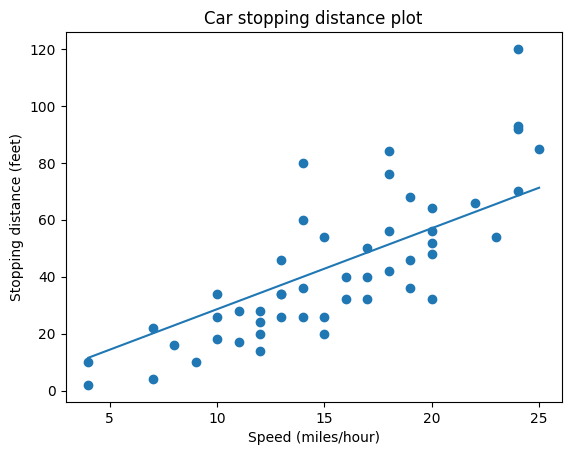

In [293]:
y_values = (x_train*w) + b
#print(x_values)
plt.scatter(car_stopping_df["Speed"], car_stopping_df["Distance"])
plt.plot(x_train, y_values)
plt.xlabel("Speed (miles/hour)")
plt.ylabel("Stopping distance (feet)")
plt.title("Car stopping distance plot")
plt.show()
#print(x_train)

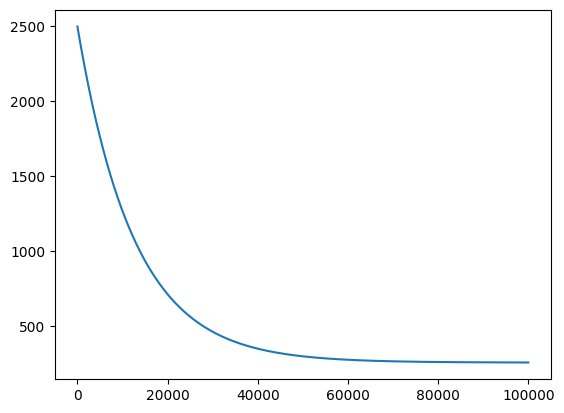

In [294]:
plt.plot(np.arange(iter_cnt), cost_values)
plt.show()